Author: Kris Swartzbaugh
CWID: 890939184 
Project 2: NP Training and Validation 
Project Description: 
    Use NumPy to implement vectorized linear and polynomial regression models and compare their performance using seperate training and test sets 

1.)Use the NumPy load() method to read the dataset. The data contains two arrays: 'features', which contains the variables CRIM through LSTAT, and 'target', which contains the variable MEDV.

2.)Use sklearn.model_selection.train_test_split() to split the features and target values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing. To make sure that your results are reproducible, pass random_state=(2021-3-11).

3.)Create a scatterplot of the training data showing the relationship between the percentage of the population that is lower status and the median value of a home. Does the relationship appear to be linear?
(Note that “status” here refers to socioeconomic status and is not a value judgement on the residents.)

4.)With LSTAT as X and MEDV as y, create and fit() an sklearn.linear_model.LinearRegression model. Using the coef_ and intercept_ attributes of the model, what is the equation for MEDV as a linear function of LSTAT?

5.)Use the coef_ and intercept_ attributes of the model to add a line representing the least squares fit to your scatter plot from experiment (3). How well does the model appear to fit the training data?

6.)Use the predict() method of the model to find the response for each value of the LSTAT attribute in the training set. Using sklearn.metrics.mean_squared_error(), find the average loss 𝓛 for the training set.

7.)Repeat experiment (6) for the test set. How do the training and test MSE values compare?

8.)Let’s see if we can fit the data better with a more flexible model. Use np.hstack() to add a degree-2 polynomial feature to X, then fit a new linear model. How do the training and test MSE values for this model compare to the previous model?

9.)Repeat experiment (5) for your polynomial model.

10.)Repeat experiments (4), (6), and (7) using all 13 input features as X. How do the training and test MSEs for this model (which is a linear model including all features) compare to the values you found for experiment (8) (which was a degree-2 polynomial model including a single feature)? What accounts for the difference?

11.)Combine experiments (8) and (10), using np.hstack() to add the squares of all 13 input features to X. How do this model’s training and test MSE scores compare to the previous model using all 13 features?


12.) Scikit-learn is also capable of constructing polynomial features for us using sklearn.preprocessing.PolynomialFeatures, but those features also include interaction features, where the feature terms are multiplied together.


        

Cells Provided:
    Markdown cell 1: This cell, author info and project description
    Code Cell 1: library imports 
    Markdown cell 2: description of the data being analyzed 
    Code Cell 2: Loading and handling of data 

   


In [105]:
import numpy as np 
import matplotlib.pyplot as plt
import sklearn.model_selection as sk 
from sklearn.linear_model import LinearRegression

 Variables in order (features):
[0] CRIM     per capita crime rate by town
[1] ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
[2] INDUS    proportion of non-retail business acres per town
[3] CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
[4] NOX      nitric oxides concentration (parts per 10 million)
[5] RM       average number of rooms per dwelling
[6] AGE      proportion of owner-occupied units built prior to 1940
[7] DIS      weighted distances to five Boston employment centres
[8] RAD      index of accessibility to radial highways
[9] TAX      full-value property-tax rate per $10,000
[10] PTRATIO  pupil-teacher ratio by town
[11] B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
[13] LSTAT    % lower status of the population
[14] MEDV     Median value of owner-occupied homes in $1000's

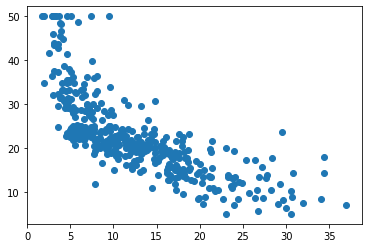

In [106]:
# Use the NumPy load() method to read the dataset. The data contains two arrays: 'features', which contains the variables CRIM through LSTAT, and 'target', which contains the variable MEDV.

features = np.load('/home/kris/projects/483 Jupyter Notebook /features.npy')
target = np.load('/home/kris/projects/483 Jupyter Notebook /target.npy')

# (2) Use sklearn.model_selection.train_test_split() to split the features and target values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing. 
#To make sure that your results are reproducible, pass random_state=(2021-3-11).
x_train, x_test, t_train, t_test = sk.train_test_split(features, target, test_size = .20, random_state=(2021-3-11))


# (3) Create a scatterplot of the training data showing the relationship between the percentage of the population that is lower status and the median value of a home. Does the relationship appear to be linear? (Note that “status” here refers to socioeconomic status and is not a value judgement on the residents.)
plt.scatter(x_train[:,12], t_train)
plt.show()

# The Data does not appear to be linear, more likely something similar to 1/(c*(x^n))

-0.980938881185576
34.991133021969475


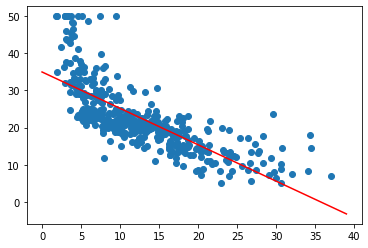

In [107]:
# (4) With LSTAT as X and MEDV as y, create and fit() an sklearn.linear_model.LinearRegression model. 
# Using the coef_ and intercept_ attributes of the model, what is the equation for MEDV as a linear function of LSTAT?


#shape the np arrays for the linear model 
x_LSTAT = x_train[:,12]
x_LSTAT = x_LSTAT.reshape(-1,1)
t_train = t_train.reshape(-1,1)

regressor = LinearRegression() 
regressor.fit(x_LSTAT,t_train)

print(regressor.coef_[0][0])
print(regressor.intercept_[0])

w = [regressor.intercept_,regressor.coef_]
# Intercept = 34.99113302, w1 = -.98093888
# Therefore the equation is y = 34.99113302 - .98093888*x


#(5) Use the coef_ and intercept_ attributes of the model to add a line representing the least squares fit to your scatter plot from experiment 
xx = []
for i in range(40):
    xx.append(i)
xx = np.array([xx])
xx = xx[0]

# print the scatter plot with the new linear regression line 
plt.scatter(x_LSTAT, t_train)
plt.plot(xx, regressor.intercept_[0]+regressor.coef_[0][0]*xx, linestyle='solid', color='red')
plt.show()

# (5) How well does the model appear to fit the training data?
#The line appears to fit a lot of the data, but misses out greatly on the earlier high points (x=5,y=50) which pulls the linear regression line up higher than it should be for other data


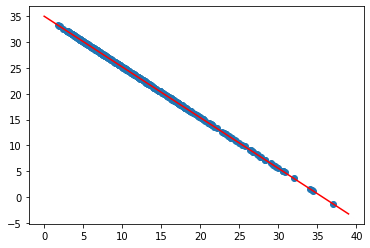

38.47893344802523
38.75054664279497


In [108]:
# (6.)Use the predict() method of the model to find the response for each value of the LSTAT attribute in the training set. Using sklearn.metrics.mean_squared_error(), find the average loss 𝓛 for the training set.
t_predict = regressor.predict(x_LSTAT)

plt.scatter(x_LSTAT, t_predict)
plt.plot(xx, regressor.intercept_[0]+regressor.coef_[0][0]*xx, linestyle='solid', color='red')
plt.show()

from sklearn.metrics import mean_squared_error
print(mean_squared_error(t_train, t_predict))
#mean squared error is 38.478, very high 

# (7.)Repeat experiment (6) for the test set. How do the training and test MSE values compare?

x_LSTAT_test = x_test[:,12]
x_LSTAT_test = x_LSTAT_test.reshape(-1,1)
t_test = t_test.reshape(-1,1)
t_predict_test = regressor.predict(x_LSTAT_test)
print(mean_squared_error(t_test, t_predict_test))
# mean squared error for the testing data is 38.75, also very high, very similar to the training data 





[[-0.49046944 -0.49046944]]


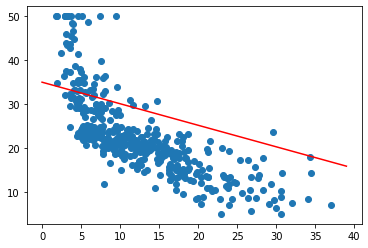

38.47893344802523
38.75054664279496


In [109]:
# 8.)Let’s see if we can fit the data better with a more flexible model. Use np.hstack() to add a degree-2 polynomial feature to X, then fit a new linear model. How do the training and test MSE values for this model compare to the previous model?
x_LSTAT1 = np.hstack((x_LSTAT,x_LSTAT))
regressor1 = LinearRegression() 
regressor1.fit(x_LSTAT1,t_train)
plt.scatter(x_LSTAT, t_train)
plt.plot(xx, regressor1.intercept_[0]+regressor1.coef_[0][0]*xx, linestyle='solid', color='red')
print(regressor1.coef_)
plt.show()

#MSE Values:
#MSE Training:
t_predict1 = regressor1.predict(x_LSTAT1)
print(mean_squared_error(t_train, t_predict1))
#mean squared error is 38.47893344802523

#MSE Testing
x_LSTAT_test1 = np.hstack((x_LSTAT_test,x_LSTAT_test))
t_predict_test1 = regressor1.predict(x_LSTAT_test1)
print(mean_squared_error(t_test, t_predict_test1))
#the mean squared error is 38.75054664279497
#the means squared errors are identical, as they have both been optimized for a linear model 



In [110]:

# 9.)Repeat experiment (5) for your polynomial model.

# 10.)Repeat experiments (4), (6), and (7) using all 13 input features as X. How do the training and test MSEs for this model (which is a linear model including all features) compare to the values you found for experiment (8) (which was a degree-2 polynomial model including a single feature)? What accounts for the difference?